In [124]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import datetime

In [99]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [100]:
x = pd.DataFrame(data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data.Outcome

In [101]:
x_train , x_test, y_train , y_test = train_test_split(x, y, test_size=.25, random_state=0)

In [128]:
list_time = []
start = datetime.datetime.now()
logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
end = datetime.datetime.now()

time = end - start
time

/home/mohammad/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


datetime.timedelta(microseconds=48855)

In [103]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8072916666666666


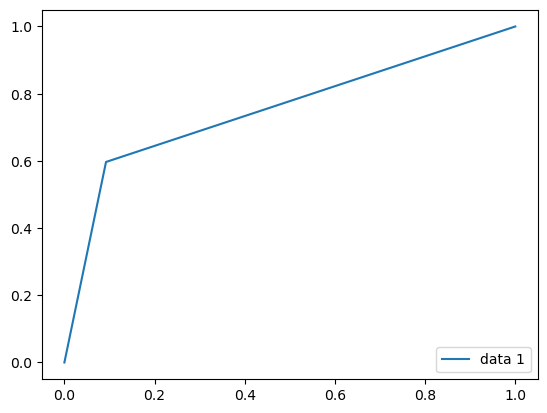

In [104]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

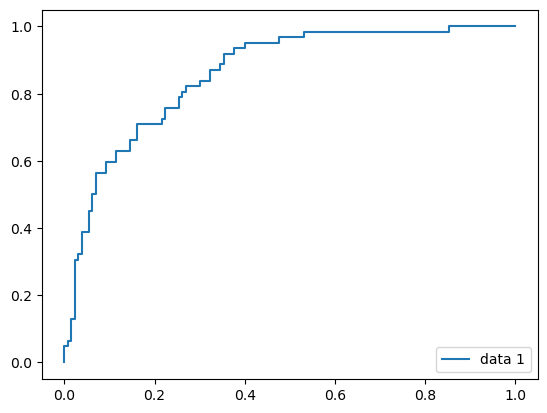

In [105]:
y_pred_probs = logreg.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
logreg.classes_

array([0, 1])

In [107]:
logreg.intercept_

array([-7.71675962])

In [108]:
logreg.coef_

array([[ 0.08411865,  0.0314357 , -0.01219612,  0.00594555, -0.00089822,
         0.08024068,  0.7296301 ,  0.02021167]])

In [109]:
logreg.predict_proba(x)

array([[0.2820009 , 0.7179991 ],
       [0.92930521, 0.07069479],
       [0.28189848, 0.71810152],
       ...,
       [0.8095371 , 0.1904629 ],
       [0.68647183, 0.31352817],
       [0.90417667, 0.09582333]])

In [110]:
logreg.predict(x)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [111]:
logreg.score(x, y)

0.7734375

In [112]:
confusion_matrix(y, logreg.predict(x))

array([[441,  59],
       [115, 153]])

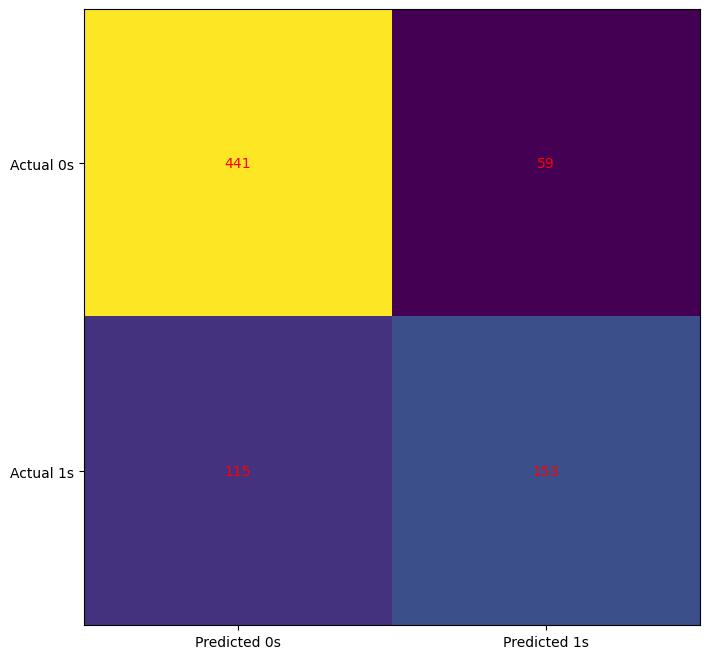

In [113]:
cm = confusion_matrix(y, logreg.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [114]:
print(classification_report(y, logreg.predict(x)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       500
           1       0.72      0.57      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



In [115]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)
# LogisticRegression(
#     penalty='l2',
#     *,
#     dual=False,
#     tol=0.0001,
#     C=1.0,
#     fit_intercept=True,
#     intercept_scaling=1,
#     class_weight=None,
#     random_state=None,
#     solver='lbfgs',
#     max_iter=100,
#     multi_class='auto',
#     verbose=0,
#     warm_start=False,
#     n_jobs=None,
#     l1_ratio=None,

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [116]:
df2 = pd.DataFrame({'Pregnancies' : [0],
                    'Glucose' : [80],
                    'BloodPressure' : [72],
                    'SkinThickness' : [0],
                    'Insulin' : [0],
                    'BMI' : [23],
                    'DiabetesPedigreeFunction' : [0.5],
                    'Age' : [30],
                    'Outcome' : [0]})

In [117]:
data2 = data.append(df2)
data2

/tmp/ipykernel_43365/1448650913.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data.append(df2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [118]:
x_train = data2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']][:768]
y_train = data2.Outcome[:768].values.reshape(-1, 1)

In [119]:
x_test = data2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']][768:]

In [120]:
model2 = LogisticRegression(solver="liblinear", C=10, random_state=0)
model2.fit(x_train, y_train.ravel())

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [121]:
y_pred = model2.predict(x_test)

In [122]:
y_pred

array([0])